# Bike Rental Assignment
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
#####    1.Which variables are significant in predicting the demand for shared bikes.
#####    2.How well those variables describe the bike demands

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

### 1.Loading  and understanding data

In [3]:
#reading the data
df=pd.read_csv("D://Upgrad/day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Description of variables
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.shape

(730, 16)

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#target variable
# "cnt" is our target variable which tells us count of total rental bikes including both casual and registered

In [9]:
#converting dteday from object type to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

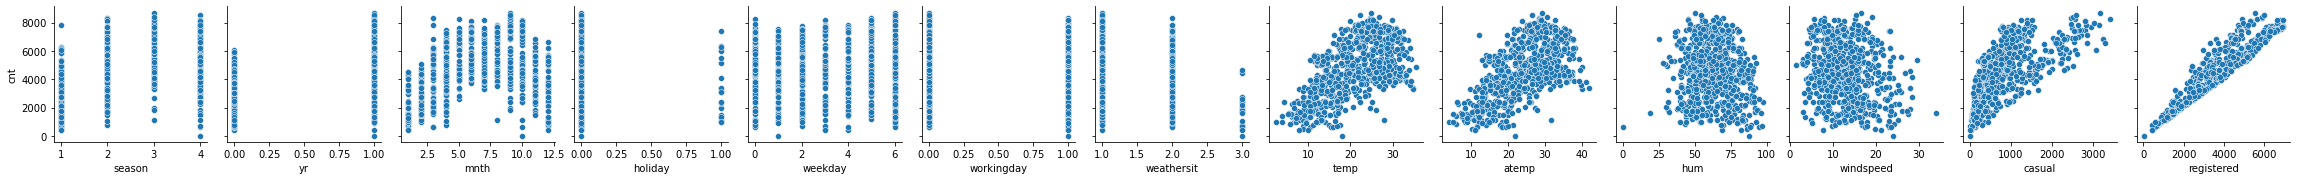

In [11]:
#data visualization
#scatterplot of numeric variables with target variable 'cnt'
sns.pairplot(diag_kind=None,data=df,x_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit',
                                          'temp','atemp','hum','windspeed','casual','registered'],
                                         y_vars='cnt')

plt.show()
#Observation:
#we find that their is good linear collinearity of 'cnt' with 'registered','casual'.
#their is less demand of rented bikes during Spring season.
#in 2019 the count of rented bikes was higher compared to 2018.
#the count is little higher during the middle of the year.
#the demand of rented bike is comparitivly less on holidays.
#the demand for bikes is comparitivly less on days with light snow and rain.
#their is collinearity between the count of rented bikes with 'temp' and 'atemp'.
#humidity is quite distributed between 25-100 and we do not see any linearity with 'cnt'.
#windspeed is distributed between 0-30 and we do not see any linearity with 'cnt'.

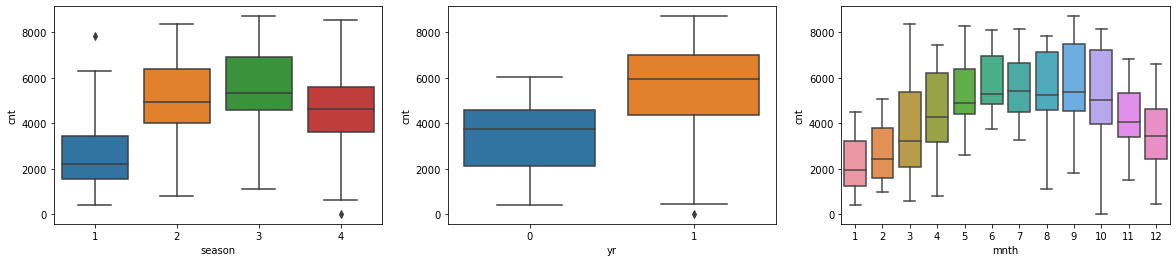

In [12]:
#data visualization
#categorical variables
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='season',y='cnt')

plt.subplot(1,3,2)
sns.boxplot(data=df,x='yr',y='cnt')

plt.subplot(1,3,3)
sns.boxplot(data=df,x='mnth',y='cnt')

plt.show()

#Observation:
#1. We see that the demand of bike is higher in fall followed by summer season.(3,2)
#2. the demand of bike was high in 2019 (1) than 2018(0).
#3. The deamand of bike was high during the middle of the year.
#4. we can see that there is a correlation between month and season parameter,as count is following the same pattern.

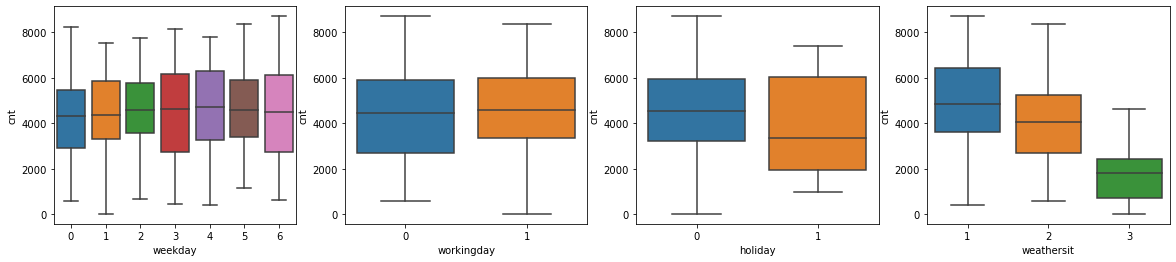

In [13]:
plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
sns.boxplot(data=df,x='weekday',y='cnt')

plt.subplot(1,4,2)
sns.boxplot(data=df,x='workingday',y='cnt')

plt.subplot(1,4,3)
sns.boxplot(data=df,x='holiday',y='cnt')

plt.subplot(1,4,4)
sns.boxplot(data=df,x='weathersit',y='cnt')

plt.show()

#Observation:
#1. we do not get much information from weekday.
#2. demand is not effected by workingday as well.
#3. on a holiday their is less demand of rented bike.
#4. demand is high in clear weather. 


### 2. Data Preparation

In [14]:
 df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
#dropping the 'instant' column because it gives us only the index number
df=df.drop(['instant'],axis=1)

In [16]:
#from the data we get that 'yr' ,'holiday','workingday' are binary categorical variable 
print(df['yr'].value_counts())
print(df['holiday'].value_counts())
print(df['workingday'].value_counts())
#we will leave them as it is

1    365
0    365
Name: yr, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64


In [17]:
#season
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
#converting season's datatype from integer to object
df['season']=df['season'].apply(lambda x: str(x))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 85.7+ 

In [20]:
#mapping season to categorical names
cat=['season']
df[cat]=df[cat].apply(lambda x: x.map({'1':'Spring','2':'Summer','3':'Fall','4':'Winter'}))

In [21]:
#creating dummy variables for season
seasons_new=pd.get_dummies(df['season'],drop_first=True)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,seasons_new],axis=1)
df=df.drop(['season'],axis=1)

In [22]:
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,2018-01-01,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2018-02-01,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,2018-03-01,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,2018-04-01,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,2018-05-01,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [23]:
#weathersit
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [24]:
#converting weathersit's datatype from integer to object
df['weathersit']=df['weathersit'].apply(lambda x: str(x))

In [25]:
#mapping season to categorical names
cat=['weathersit']
df[cat]=df[cat].apply(lambda x: x.map({'1':'Clear','2':'Mist','3':'Light Snow/Rain','4':'Heavy Rain'}))

In [26]:
#creating dummy variables for season
weather=pd.get_dummies(df['weathersit'],drop_first=True)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,weather],axis=1)
df=df.drop(['weathersit'],axis=1)

In [27]:
#converting mnth's datatype from integer to object
df['mnth']=df['mnth'].apply(lambda x: str(x))

In [28]:
#mapping season to categorical names
cat=['mnth']
df[cat]=df[cat].apply(lambda x: x.map({'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May',
                                       '6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}))

In [29]:
#creating dummy variables for season
month=pd.get_dummies(df['mnth'],drop_first=True)

#concat seasons_new to df dataframe and dropping season column
df=pd.concat([df,month],axis=1)
df=df.drop(['mnth'],axis=1)

In [30]:
#checking the weekend

df['workingday'][(df['weekday']==0) | (df['weekday']==6)].value_counts()

#Observation:
#we find that weekday 0 and 6 are weekends because it is a non working day.
#we will take:
# 0:Sunday
# 1:Monday
# 2:Tuesday
# 3.Wednesday
# 4.Thrusday
# 5.Friday
# 6.Saturday

0    210
Name: workingday, dtype: int64

In [31]:
#creating dummy variables for 'weekday'

#converting weekday's datatype from integer to object
df['weekday']=df['weekday'].apply(lambda x: str(x))

#mapping weekday to categorical names
cat=['weekday']
df[cat]=df[cat].apply(lambda x: x.map({'0':'Sun', '1':'Mon','2':'Tue','3':'Wed','4':'Thr','5':'Fri',
                                       '6':'Sat'}))

week=pd.get_dummies(df['weekday'],drop_first=True)

#concat week to df dataframe and dropping weekday column
df=pd.concat([df,week],axis=1)
df=df.drop(['weekday'],axis=1)

In [32]:
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,1,0,0,0,0
1,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,0
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,1,0,0,0,0,0
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,1,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#dropping the dteday column as it is not numeric and not beneficial for making prediction
df=df.drop(['dteday'],axis=1)



In [34]:
#we know that 'cnt' is the sum of 'casual' and 'registered' so we will drop them as well,
#because we want to predict the overall count and not segregate it
df=df.drop(['casual','registered'],axis=1)

In [35]:
#df=df.drop(['atemp'],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Spring           730 non-null    uint8  
 9   Summer           730 non-null    uint8  
 10  Winter           730 non-null    uint8  
 11  Light Snow/Rain  730 non-null    uint8  
 12  Mist             730 non-null    uint8  
 13  Aug              730 non-null    uint8  
 14  Dec              730 non-null    uint8  
 15  Feb              730 non-null    uint8  
 16  Jan              730 non-null    uint8  
 17  Jul             

### 3. Train Test Split

In [37]:
#splitting into train test split
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,train_size=0.7,random_state=50)

In [38]:
df_train.shape

(510, 30)

In [39]:
df_test.shape

(220, 30)

### 4. Scaling the Features

In [40]:
#we will use normalisation technique to scale.
#also we will only scale the numeric variables and not the binary one.

from sklearn.preprocessing import MinMaxScaler

#creating an object of scaler
scaler=MinMaxScaler()

In [41]:
#numeric variables to be scaled

num=['temp','atemp','hum','windspeed','cnt']

#scaling the numeric variables
df_train[num] = scaler.fit_transform(df_train[num])

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0.515992,0,0,...,0,0,0,0,0,0,0,0,0,1
14,0,0,0,0.223565,0.236172,0.513954,0.243603,0.141049,1,0,...,0,0,0,0,0,1,0,0,0,0
204,0,0,0,0.989306,1.000000,0.567625,0.267859,0.412333,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0.871664,0.821838,0.458136,0.150755,0.586401,0,0,...,0,0,0,0,0,1,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0.592269,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.707843,0.552655,0.545216,0.644402,0.317884,0.510488,0.245098,0.254902,...,0.100000,0.088235,0.086275,0.064706,0.152941,0.135294,0.133333,0.145098,0.150980,0.139216
std,0.500179,0.151726,0.455201,0.230616,0.223335,0.149118,0.167384,0.223400,0.430568,0.436234,...,0.300295,0.283915,0.281045,0.246248,0.360284,0.342373,0.340268,0.352545,0.358381,0.346511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345522,0.524581,0.197845,0.350523,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.556759,0.648347,0.295422,0.517027,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.732269,0.752146,0.406471,0.672141,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

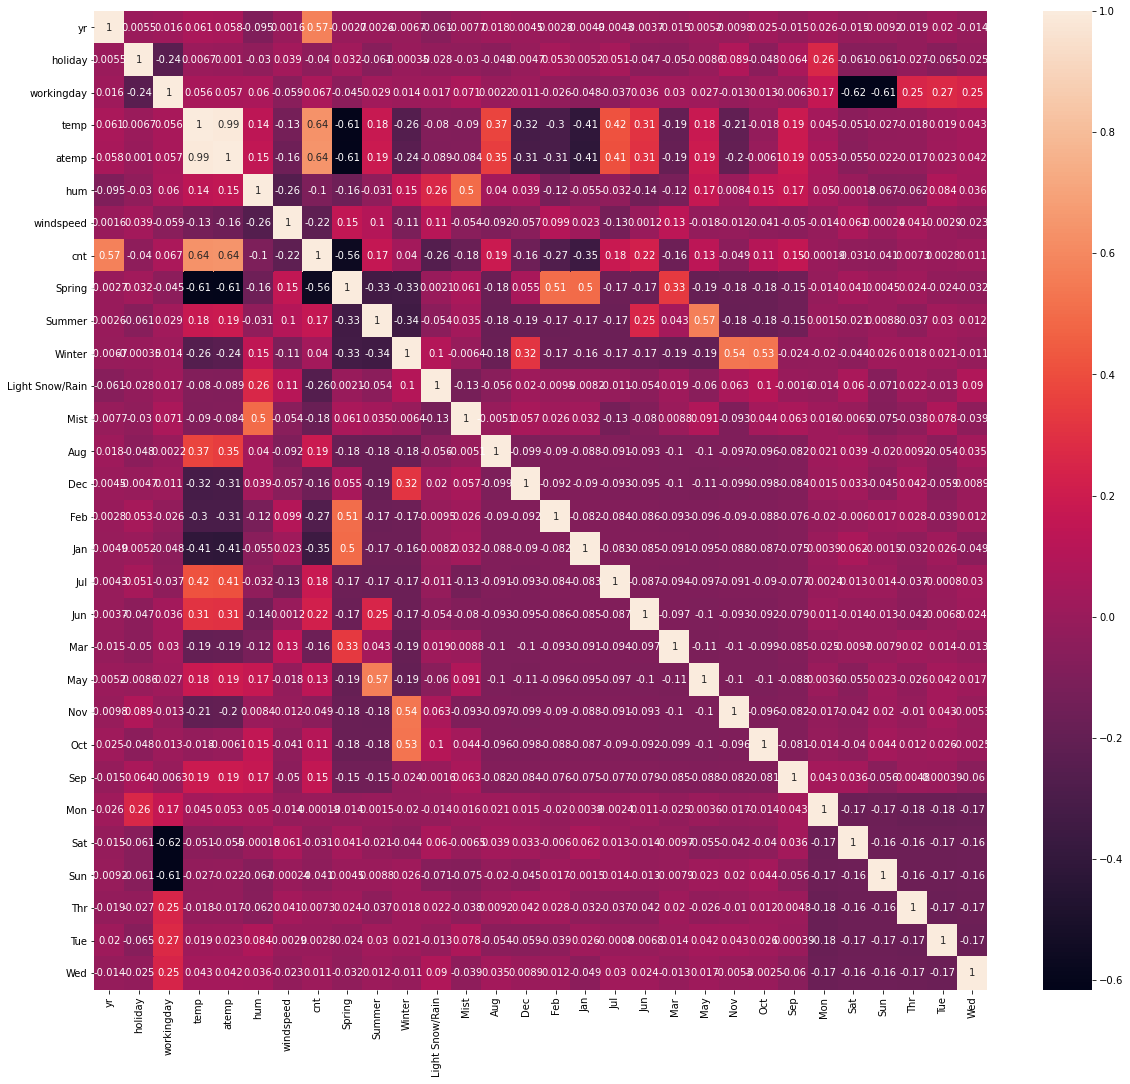

In [44]:
#heatap to see correlation
plt.figure(figsize=(20,18))
sns.heatmap(df_train.corr(),annot=True)

#Observation:
#we see that temp and atemp are highly correlated.

### 5. Training the model

In [45]:
#we will first use the automatic selection of variables usig RFE
 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#seperating the X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train
 
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
rfe=RFE(lm,18)
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 11),
 ('Spring', True, 1),
 ('Summer', False, 7),
 ('Winter', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 8),
 ('Jun', True, 1),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', True, 1),
 ('Sun', False, 2),
 ('Thr', False, 10),
 ('Tue', False, 5),
 ('Wed', False, 12)]

In [47]:
#columns selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'Spring',
       'Winter', 'Light Snow/Rain', 'Mist', 'Dec', 'Feb', 'Jan', 'Jun', 'May',
       'Nov', 'Sep', 'Sat'],
      dtype='object')

In [48]:
#taking the columns selected by RFE
X_train_rfe=X_train[col]

In [49]:
#using statsmodel to fit the Linear Rgression model
import statsmodels.api as sm

X_train_rfe=sm.add_constant(X_train_rfe)

lr=sm.OLS(y_train, X_train_rfe)
lr=lr.fit()

In [50]:
#summary of model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     142.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.01e-181
Time:                        15:33:55   Log-Likelihood:                 507.52
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     491   BIC:                            -896.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2494      0.030      8.358      0.000       0.191       0.308
yr                  0.2350      0.008     28.638      0.000       0.219       0.251
holiday            -0.0289      0.029     -0.994      0.321      -0.086       0.028
workingday          0.0368      0.012      3.018      0.003       0.013       0.061
temp                0.1866      0.126      1.477      0.140      -0.062       0.435
atemp               0.2316      0.129      1.792      0.074      -0.022       0.486
hum                -0.1313      0.038     -3.417      0.001      -0.207      -0.056
Spring             -0.0910      0.018     -4.957      0.000      -0.127      -0.055
Winter              0.1044      0.015      6.828      0.000       0.074       0.134
Light Snow/Rain    -0.2500      0.026     -9.513      0.000      -0.302      -0.198
Mist               -0.0546      0.011     -5.001      0.000      -0.076      -0.033
Dec                -0.0586      0.018     -3.274      0.001      -0.094      -0.023
Feb                -0.0295      0.021     -1.420      0.156      -0.070       0.011
Jan                -0.0537      0.022     -2.471      0.014      -0.096      -0.011
Jun                 0.0382      0.016      2.333      0.020       0.006       0.070
May                 0.0420      0.015      2.733      0.007       0.012       0.072
Nov                -0.0707      0.019     -3.709      0.000      -0.108      -0.033
Sep                 0.0634      0.018      3.606      0.000       0.029       0.098
Sat                 0.0491      0.016      3.105      0.002       0.018       0.080
==============================================================================
Omnibus:                      112.786   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.657
Skew:                          -0.928   Prob(JB):                    3.81e-103
Kurtosis:                       7.331   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif to check multicollinearity
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif', ascending=False)
vif

,features,vif
0,const,54.62
4,temp,52.00
5,atemp,51.05
7,Spring,3.83
8,Winter,2.70
6,hum,2.01
13,Jan,2.00
3,workingday,1.88
12,Feb,1.87
16,Nov,1.79


In [52]:
#we see that 'holiday' has high p-value so dropping it
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [53]:
#fitting the model again

X_train_rfe=sm.add_constant(X_train_rfe)

lr1=sm.OLS(y_train, X_train_rfe)
lr1=lr1.fit()


In [54]:
#summary
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     150.9
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.33e-182
Time:                        15:33:55   Log-Likelihood:                 507.01
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     492   BIC:                            -901.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2467      0.030      8.303      0.000       0.188       0.305
yr                  0.2350      0.008     28.642      0.000       0.219       0.251
workingday          0.0411      0.011      3.607      0.000       0.019       0.063
temp                0.1790      0.126      1.420      0.156      -0.069       0.427
atemp               0.2363      0.129      1.829      0.068      -0.018       0.490
hum                -0.1301      0.038     -3.389      0.001      -0.206      -0.055
Spring             -0.0916      0.018     -4.993      0.000      -0.128      -0.056
Winter              0.1048      0.015      6.857      0.000       0.075       0.135
Light Snow/Rain    -0.2503      0.026     -9.529      0.000      -0.302      -0.199
Mist               -0.0549      0.011     -5.027      0.000      -0.076      -0.033
Dec                -0.0602      0.018     -3.378      0.001      -0.095      -0.025
Feb                -0.0308      0.021     -1.485      0.138      -0.071       0.010
Jan                -0.0548      0.022     -2.523      0.012      -0.097      -0.012
Jun                 0.0388      0.016      2.374      0.018       0.007       0.071
May                 0.0418      0.015      2.722      0.007       0.012       0.072
Nov                -0.0733      0.019     -3.880      0.000      -0.110      -0.036
Sep                 0.0619      0.018      3.532      0.000       0.027       0.096
Sat                 0.0534      0.015      3.513      0.000       0.024       0.083
==============================================================================
Omnibus:                      113.789   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.321
Skew:                          -0.941   Prob(JB):                    1.23e-102
Kurtosis:                       7.306   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#vif
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif', ascending=False)
vif

,features,vif
0,const,54.18
3,temp,51.82
4,atemp,50.98
6,Spring,3.82
7,Winter,2.70
5,hum,2.01
12,Jan,1.99
11,Feb,1.86
15,Nov,1.76
17,Sat,1.66


In [56]:
#collinearity between temp and atemp
X_train_rfe['temp'].corr(X_train_rfe['atemp'])
#we see that thir their is very high correlation

0.9896136855050263

In [57]:
# although the p-value of temp is higher than atemp , 
#we will drop atemp first because temp is a important parameter in prediction, and we have already seen in heatmap that 
#temp and atemp are highly correlated.

X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)


In [58]:
#fitting the model again

X_train_rfe=sm.add_constant(X_train_rfe)

lr2=sm.OLS(y_train, X_train_rfe)
lr2=lr2.fit()


In [59]:
#summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     159.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          5.43e-183
Time:                        15:33:55   Log-Likelihood:                 505.28
No. Observations:                 510   AIC:                            -976.6
Df Residuals:                     493   BIC:                            -904.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2470      0.030      8.295      0.000       0.189       0.306
yr                  0.2350      0.008     28.575      0.000       0.219       0.251
workingday          0.0410      0.011      3.589      0.000       0.019       0.063
temp                0.4017      0.033     12.103      0.000       0.336       0.467
hum                -0.1204      0.038     -3.159      0.002      -0.195      -0.046
Spring             -0.0921      0.018     -5.007      0.000      -0.128      -0.056
Winter              0.1066      0.015      6.967      0.000       0.077       0.137
Light Snow/Rain    -0.2563      0.026     -9.809      0.000      -0.308      -0.205
Mist               -0.0563      0.011     -5.149      0.000      -0.078      -0.035
Dec                -0.0618      0.018     -3.468      0.001      -0.097      -0.027
Feb                -0.0315      0.021     -1.516      0.130      -0.072       0.009
Jan                -0.0571      0.022     -2.630      0.009      -0.100      -0.014
Jun                 0.0395      0.016      2.407      0.016       0.007       0.072
May                 0.0431      0.015      2.803      0.005       0.013       0.073
Nov                -0.0743      0.019     -3.929      0.000      -0.111      -0.037
Sep                 0.0611      0.018      3.481      0.001       0.027       0.096
Sat                 0.0529      0.015      3.476      0.001       0.023       0.083
==============================================================================
Omnibus:                      114.531   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.894
Skew:                          -0.945   Prob(JB):                    4.58e-104
Kurtosis:                       7.338   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#vif
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif', ascending=False)
vif

,features,vif
0,const,54.18
5,Spring,3.82
3,temp,3.57
6,Winter,2.69
11,Jan,1.99
4,hum,1.97
10,Feb,1.86
14,Nov,1.76
16,Sat,1.66
2,workingday,1.65


In [61]:
# dropping 'Feb' as it has a high p-value
X_train_rfe=X_train_rfe.drop(['Feb'],axis=1)


In [62]:
#fitting the model again

X_train_rfe=sm.add_constant(X_train_rfe)

lr3=sm.OLS(y_train, X_train_rfe)
lr3=lr3.fit()


In [63]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.28e-183
Time:                        15:33:56   Log-Likelihood:                 504.09
No. Observations:                 510   AIC:                            -976.2
Df Residuals:                     494   BIC:                            -908.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2406      0.030      8.151      0.000       0.183       0.299
yr                  0.2347      0.008     28.510      0.000       0.219       0.251
workingday          0.0413      0.011      3.612      0.000       0.019       0.064
temp                0.4108      0.033     12.569      0.000       0.347       0.475
hum                -0.1211      0.038     -3.174      0.002      -0.196      -0.046
Spring             -0.1042      0.017     -6.284      0.000      -0.137      -0.072
Winter              0.1056      0.015      6.903      0.000       0.076       0.136
Light Snow/Rain    -0.2549      0.026     -9.748      0.000      -0.306      -0.204
Mist               -0.0559      0.011     -5.112      0.000      -0.077      -0.034
Dec                -0.0538      0.017     -3.155      0.002      -0.087      -0.020
Jan                -0.0405      0.019     -2.157      0.031      -0.077      -0.004
Jun                 0.0388      0.016      2.366      0.018       0.007       0.071
May                 0.0435      0.015      2.830      0.005       0.013       0.074
Nov                -0.0704      0.019     -3.753      0.000      -0.107      -0.034
Sep                 0.0614      0.018      3.491      0.001       0.027       0.096
Sat                 0.0533      0.015      3.496      0.001       0.023       0.083
==============================================================================
Omnibus:                      109.469   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.278
Skew:                          -0.899   Prob(JB):                    8.33e-100
Kurtosis:                       7.271   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#vif
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif', ascending=False)
vif

,features,vif
0,const,53.09
3,temp,3.45
5,Spring,3.10
6,Winter,2.68
4,hum,1.97
13,Nov,1.73
15,Sat,1.66
2,workingday,1.65
8,Mist,1.64
9,Dec,1.48


In [65]:
# although the p-value of 'Jan' is under the permissible limit we will still drop it and try to improve the performance of model
X_train_rfe=X_train_rfe.drop(['Jan'],axis=1)


#fitting the model again

X_train_rfe=sm.add_constant(X_train_rfe)

lr4=sm.OLS(y_train, X_train_rfe)
lr4=lr4.fit()


In [66]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.8
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          9.40e-184
Time:                        15:33:56   Log-Likelihood:                 501.70
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     495   BIC:                            -909.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2331      0.029      7.922      0.000       0.175       0.291
yr                  0.2341      0.008     28.348      0.000       0.218       0.250
workingday          0.0410      0.011      3.576      0.000       0.018       0.064
temp                0.4300      0.032     13.622      0.000       0.368       0.492
hum                -0.1310      0.038     -3.445      0.001      -0.206      -0.056
Spring             -0.1101      0.016     -6.710      0.000      -0.142      -0.078
Winter              0.1073      0.015      6.993      0.000       0.077       0.137
Light Snow/Rain    -0.2506      0.026     -9.576      0.000      -0.302      -0.199
Mist               -0.0539      0.011     -4.928      0.000      -0.075      -0.032
Dec                -0.0454      0.017     -2.728      0.007      -0.078      -0.013
Jun                 0.0371      0.016      2.253      0.025       0.005       0.069
May                 0.0448      0.015      2.906      0.004       0.015       0.075
Nov                -0.0658      0.019     -3.519      0.000      -0.103      -0.029
Sep                 0.0618      0.018      3.501      0.001       0.027       0.096
Sat                 0.0520      0.015      3.403      0.001       0.022       0.082
==============================================================================
Omnibus:                      105.221   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.716
Skew:                          -0.872   Prob(JB):                     9.80e-93
Kurtosis:                       7.111   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#vif
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif', ascending=False)
vif

#the p-values and VIF have improved after dropping Jan

,features,vif
0,const,52.34
3,temp,3.20
5,Spring,3.01
6,Winter,2.68
4,hum,1.94
12,Nov,1.70
2,workingday,1.65
14,Sat,1.65
8,Mist,1.63
9,Dec,1.40


In [68]:
# although the p-value of 'Jun' is under the permissible limit we will still drop it and check the performance of model
X_train_rfe=X_train_rfe.drop(['Jun'],axis=1)


#fitting the model again

X_train_rfe=sm.add_constant(X_train_rfe)

lr5=sm.OLS(y_train, X_train_rfe)
lr5=lr5.fit()



In [69]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          8.21e-184
Time:                        15:33:56   Log-Likelihood:                 499.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     496   BIC:                            -910.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2387      0.029      8.107      0.000       0.181       0.296
yr                  0.2333      0.008     28.164      0.000       0.217       0.250
workingday          0.0417      0.012      3.625      0.000       0.019       0.064
temp                0.4423      0.031     14.168      0.000       0.381       0.504
hum                -0.1419      0.038     -3.747      0.000      -0.216      -0.068
Spring             -0.1137      0.016     -6.934      0.000      -0.146      -0.081
Winter              0.1028      0.015      6.730      0.000       0.073       0.133
Light Snow/Rain    -0.2494      0.026     -9.494      0.000      -0.301      -0.198
Mist               -0.0526      0.011     -4.798      0.000      -0.074      -0.031
Dec                -0.0444      0.017     -2.654      0.008      -0.077      -0.012
May                 0.0380      0.015      2.501      0.013       0.008       0.068
Nov                -0.0653      0.019     -3.473      0.001      -0.102      -0.028
Sep                 0.0556      0.018      3.176      0.002       0.021       0.090
Sat                 0.0523      0.015      3.409      0.001       0.022       0.082
==============================================================================
Omnibus:                       99.890   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.080
Skew:                          -0.845   Prob(JB):                     1.31e-82
Kurtosis:                       6.859   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#vif
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif', ascending=False)
vif


#the p-values and VIF have improved after dropping Jun

,features,vif
0,const,51.97
3,temp,3.10
5,Spring,2.98
6,Winter,2.63
4,hum,1.91
11,Nov,1.70
13,Sat,1.65
2,workingday,1.64
8,Mist,1.62
9,Dec,1.40


In [71]:
#Observation:
#1. The R-squared value of the model is 0.834 and Adjusted R-squared is 0.830.
#2. The prob(F-statistics) value is very small which tells that the overall model is significant.
#2. In lr5 the p-values of all the variables are very small, hence they are significant
#3. The VIF of variables is under 5 , which represents very little multicollinearuty.


### 6. Residual Analysis

In [72]:
#residual analysis

y_train_pred=lr5.predict(X_train_rfe)

In [73]:
#calculating the residuals
res=y_train_pred-y_train

Text(0.5, 1.0, 'Resisual Analysis')

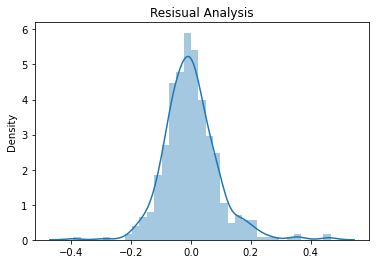

In [74]:
#plotting a distplot for residuals
ax=sns.distplot(res)
ax.set_title("Resisual Analysis")
#Observation:
#we see that the error terms are normally distributed with their mean at 0.

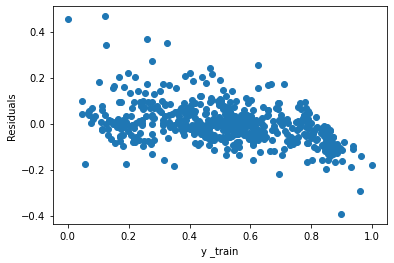

In [75]:
#pattern in residual
plt.scatter(y_train,res)
plt.xlabel("y _train")
plt.ylabel("Residuals")
plt.show()

### 7. Prediction and Evaluation on Test Set

In [76]:
#The test set should also be scaled ,otherwise our predictions will be hampered.
#scaling the test set
#we do not fit on test set we only transform
df_test[num]=scaler.transform(df_test[num])

In [77]:
#splitting into X and y
y_test=df_test.pop('cnt')
X_test=df_test

In [78]:
#dropping 'const' from train set
X_train_rfe=X_train_rfe.drop('const',axis=1)

In [79]:
#taking the variables present in our final model
X_test_new=X_test[X_train_rfe.columns]

#adding a constant in test set
X_test_new=sm.add_constant(X_test_new)

In [80]:
#predicting the y_test value based on model
y_pred=lr5.predict(X_test_new)

In [81]:
#evaluate the model using r2_score
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8126895053092138

In [82]:
#Observation:
#1. We observer that the R-squared for training data was 0.834
#2. We observe that the R-squared score for test data was 0.813.
#3. The difference between the R-score of train and test data is small, so we conclude that the model is significant.


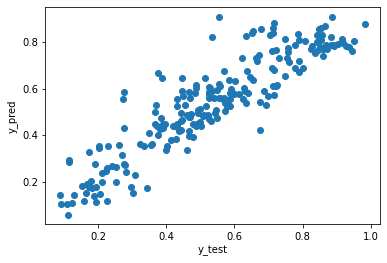

In [83]:
#plotting y_test and y_pred to understand the spread
ax=plt.scatter(x=y_test,y=y_pred)
ax=plt.xlabel("y_test")
ax=plt.ylabel("y_pred")


### Assumptions


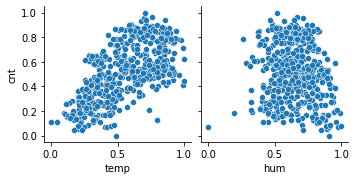

In [84]:
#1. Linear relation between X and y
df_final=pd.concat([X_train_rfe,y_train],axis=1)

sns.pairplot(diag_kind=None,data=df_final,x_vars=['temp','hum'],y_vars='cnt')
plt.show()

#after the final model we have temp and hum as continuous variables.
#we see that temp is having positive linearity with cnt
#hum is haviing negative linearlty with cnt.

Text(0.5, 1.0, 'Resisual Analysis')

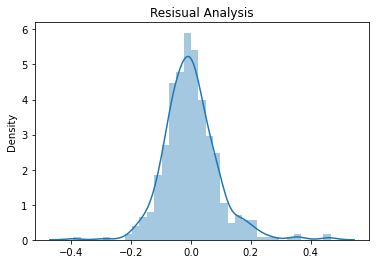

In [85]:
#2. Error terms are noermally distributed
ax=sns.distplot(res)
ax.set_title("Resisual Analysis")
#Observation:
#we see that the error terms are normally distributed with their mean at 0.

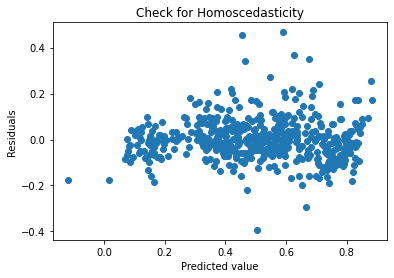

In [86]:
#3.Homoscedasticity - constant variance
plt.scatter(y_train_pred,res)
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.title("Check for Homoscedasticity")
plt.show()

#we see that there is equal or almost equal variance.

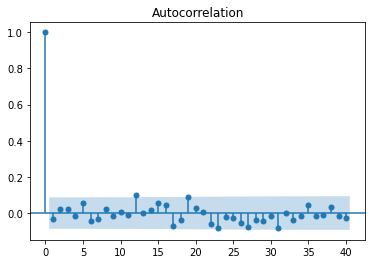

In [93]:
#4. Autocorrelation - error terms shouls be independent.

sm.graphics.tsa.plot_acf(res, lags=40)
plt.show()
#we see no pattern, i.e. the error terms are independent

In [88]:
#5. Multicollinearity is handled

#vif is shown above after the final model 
#we see that the vifs are very small

### Hypothesis Testing



Hypothesis testing states that:

    H0:B1=B2=...=Bn=0
    H1: at least one Bi!=0



In [89]:
#coffeficients of the final model
lr5.params.sort_values()

#From the lr5 model summary,
#it is evident that all our coefficients are not equal to 0 ,
#which means We REJECT the NULL HYPOTHESIS

Light Snow/Rain   -0.249418
hum               -0.141905
Spring            -0.113717
Nov               -0.065252
Mist              -0.052622
Dec               -0.044373
May                0.037991
workingday         0.041737
Sat                0.052333
Sep                0.055593
Winter             0.102792
yr                 0.233329
const              0.238651
temp               0.442251
dtype: float64

### Conclusion

In [90]:
#Observation:

#our best fit line would be
#note :the coffecients are rounded to 2 decimal places.

#y = 0.24 + 0.44(temp) - 0.25(Light Snow/Rain) + 0.23(yr) - 0.14(hum) - 0.11(Spring) - 0.07(Nov) - 0.53(Mist) 
#    -0.04(Dec) + 0.05(Sat) + 0.04(May) + 0.10(Winter) + 0.06(Sep) + 0.04(workingday)

In [91]:
#Observation
#The top three parameters contributing in the prediction are:
#   1. temp - if temperature increases by 1 unit, count of bikes increases 0.44 times.
#   2. Light Snow/Rain - if Light Snow/Rain increases by 1 unit , count of bikes decreases 0.25 times.  
#   3. yr  - with every inncreasing year count of bikes increases 0.23 times.


# Some other good contributors are :
#4. hum (humidity)
#5. Spring
#6. Winter
